In [17]:
import pandas as pd
import numpy as np

In [ ]:
melb_df = pd.read_csv('data/melb_data_fe.csv')

### Основные параметры метода sort_values()
- by — имя или список имён столбцов, по значениям которых производится сортировка.
- axis — ось, по которой производится сортировка (0 — строки, 1 — столбцы). По умолчанию сортировка производится по строкам.
- ascending — сортировка по возрастанию (от меньшего к большему). По умолчанию параметр выставлен на True, для сортировки по убыванию (от большего к меньшему) необходимо выставить его на False.
- ignore_index — создаются ли новые индексы в таблице. По умолчанию выставлен на False и сохраняет индексы изначальной таблицы.
- inplace — производится ли замена исходной таблицы на отсортированную. По умолчанию параметр выставлен на False, то есть замены не производится. Чтобы переопределить исходную таблицу на отсортированную, необходимо выставить этот параметр на True.

In [ ]:
# сортируем таблицу по возрастанию цены объектов недвижимости (Price):
melb_df.sort_values(by='Price').head(10)

# ортируем таблицу по убыванию даты продажи объекта (Date)
melb_df.sort_values(by='Date', ascending=False)

Для сортировки по значениям нескольких столбцов необходимо передать названия этих столбцов в параметр by в виде списка. При этом важно обращать внимание на порядок следования столбцов.

In [ ]:
melb_df.sort_values(by=['Distance', 'Price']).loc[::10, ['Distance', 'Price']]

# Мы получили таблицу, отсортированную по возрастанию расстояния до центра города. 
# Если встречаются объекты недвижимости, у которых расстояние оказывается одинаковым, 
# то внутри такой группы производится сортировка по цене объекта.

Найдём информацию о таунхаусах (Type), проданных компанией (SellerG) McGrath, у которых коэффициент соотношения площадей здания и участка (AreaRatio) меньше -0.8. Результат отсортируем по дате продажи (Date) в порядке возрастания, а после проведём сортировку по убыванию коэффициента соотношения площадей. Также обновим старые индексы на новые, установив параметр ignore_index на True. Для наглядности результата выберем из таблицы только столбцы Data и AreaRatio:

In [3]:
mask1 = melb_df['AreaRatio'] < -0.8
mask2 = melb_df['Type'] == 'townhouse'
mask3 = melb_df['SellerG'] == 'McGrath'
melb_df[mask1 & mask2 & mask3].sort_values(
    by=['Date', 'AreaRatio'],
    ascending=[True, False],
    ignore_index=True
).loc[:, ['Date', 'AreaRatio']]

,Date,AreaRatio
0,2016-07-26,-0.974922
1,2016-09-24,-0.971831
2,2016-11-27,-0.953608
3,2016-12-11,-0.945946
4,2017-08-04,-0.947368
5,2017-08-04,-0.970874


### Основные параметры метода groupby()
- by — имя или список имён столбцов, по которым производится группировка.
- axis — ось, по которой производится группировка (0 — строки, 1 — столбцы). По умолчанию группировка производится по строкам.
- as_index — добавляется ли дополнительный индекс к таблице. По умолчанию установлен на True.

Метод groupby() возвращает объект DataFrameGroupBy, который хранит в себе информацию о том, какие строки относятся к определённой группе, и сам по себе не представляет для нас интереса. 

Однако к этому объекту можно применять уже знакомые нам агрегирующие методы (mean, median, sum и т. д.), чтобы рассчитывать показатели внутри каждой группы.

In [ ]:
# ГРУППИРОВКА ДАННЫХ ПО ОДНОМУ КРИТЕРИЮ С ОДНОЙ АГРЕГАЦИЕЙ
melb_df.groupby(by='Type').mean()

Как правило, нам не нужна информация обо всех столбцах, поэтому агрегирующие методы можно применять только к интересующему нас столбцу. Например, давайте сравним средние цены на объекты в зависимости от их типа:

In [2]:
melb_df.groupby('Type')['Price'].mean()

Type
house        1.242665e+06
townhouse    9.337351e+05
unit         6.051275e+05
Name: Price, dtype: float64

Давайте построим таблицу для анализа продаж по месяцам. Для этого найдём количество продаж, а также среднее и максимальное значения цен объектов недвижимости (Price), сгруппированных по номеру месяца продажи (MonthSale). Результат отсортируем по количеству продаж в порядке убывания:

In [4]:
melb_df.groupby('MonthSale')['Price'].agg(
    ['count', 'mean', 'max']
).sort_values(by='count', ascending=False)

,count,mean,max
MonthSale,,,
8,1850,1.056371e+06,6500000.0
7,1835,9.314698e+05,9000000.0
5,1644,1.097807e+06,8000000.0
6,1469,1.068981e+06,7650000.0
3,1408,1.146762e+06,5600000.0
4,1246,1.050479e+06,5500000.0
9,1188,1.126349e+06,6400000.0
10,854,1.135970e+06,6250000.0
11,750,1.142503e+06,5050000.0


Примечание. Если вам нужна полная информация обо всех основных статистических характеристиках внутри каждой группы, вы можете воспользоваться методом agg(), передав в качестве его параметра строку 'describe':

melb_df.groupby('MonthSale')['Price'].agg('describe')

In [5]:
#можно построить таблицу, в которой мы будем учитывать не только число комнат, 
# но и тип здания (Type). Для этого в параметрах метода groupby() укажем список 

melb_df.groupby(['Rooms', 'Type'])['Price'].mean()

Rooms  Type     
1      house        8.668655e+05
       townhouse    5.927045e+05
       unit         3.899289e+05
2      house        1.017238e+06
       townhouse    7.101585e+05
       unit         6.104905e+05
3      house        1.109233e+06
       townhouse    9.847087e+05
       unit         8.505963e+05
4      house        1.462283e+06
       townhouse    1.217092e+06
       unit         1.037476e+06
5      house        1.877327e+06
       townhouse    1.035000e+06
6      house        1.869508e+06
       unit         5.200000e+05
7      house        1.920700e+06
8      house        1.510286e+06
       unit         2.250000e+06
10     house        9.000000e+05
Name: Price, dtype: float64

В результате выполнения такого кода мы получаем Series, которая обладает несколькими уровнями индексов: первый уровень — число комнат, второй уровень — тип здания. Такая организация индексов называется иерархической. Вычисление параметра (средней цены) происходит во всех возможных комбинациях признаков.

Для того, чтобы финальный результат был представлен в виде сводной таблицы (первый группировочный признак по строкам, а второй — по столбцам), а не в виде Series с иерархическими индексами, к результату чаще всего применяют метод unstack(), который позволяет переопределить вложенный индекс в виде столбцов таблицы:

In [6]:
melb_df.groupby(['Rooms', 'Type'])['Price'].mean().unstack()

Type,house,townhouse,unit
Rooms,,,
1,8.668655e+05,5.927045e+05,3.899289e+05
2,1.017238e+06,7.101585e+05,6.104905e+05
3,1.109233e+06,9.847087e+05,8.505963e+05
4,1.462283e+06,1.217092e+06,1.037476e+06
5,1.877327e+06,1.035000e+06,NaN
6,1.869508e+06,NaN,5.200000e+05
7,1.920700e+06,NaN,NaN
8,1.510286e+06,NaN,2.250000e+06
10,9.000000e+05,NaN,NaN


## МЕТОД PIVOT_TABLE ДЛЯ ПОСТРОЕНИЯ СВОДНЫХ ТАБЛИЦ
На самом деле метод groupby редко используется при двух параметрах, так как для построения сводных таблиц существует специальный и более простой метод — pivot_table().
- values — имя столбца, по которому необходимо получить сводные данные, применяя агрегирующую функцию;
- index — имя столбца, значения которого станут строками сводной таблицы;
- columns — имя столбца, значения которого станут столбцами сводной таблицы;
- aggfunc — имя или список имён агрегирующих функций (по умолчанию — подсчёт среднего, 'mean');
- fill_value — значение, которым необходимо заполнить пропуски (по умолчанию пропуски не заполняются).

In [7]:
melb_df.pivot_table(
    values='Price',
    index='Rooms',
    columns='Type',    fill_value=0
).round()

Type,house,townhouse,unit
Rooms,,,
1,866866.0,592705.0,389929.0
2,1017238.0,710158.0,610491.0
3,1109233.0,984709.0,850596.0
4,1462283.0,1217092.0,1037476.0
5,1877327.0,1035000.0,0.0
6,1869508.0,0.0,520000.0
7,1920700.0,0.0,0.0
8,1510286.0,0.0,2250000.0
10,900000.0,0.0,0.0


In [8]:
# найдём, как зависит средняя и медианная площадь участка (Landsize) 
# от типа объекта (Type) и его региона (Regionname)
melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)

median                        mean              \
Type                        house townhouse unit        house   townhouse   
Regionname                                                                  
Eastern Metropolitan        674.0     233.5  203   717.422847  269.440678   
Eastern Victoria            843.0       0.0  230  3108.960000    0.000000   
Northern Metropolitan       459.5     134.0    0   619.249092  317.325733   
Northern Victoria           724.0       0.0    0  3355.463415    0.000000   
South-Eastern Metropolitan  630.5     240.0  199   664.306701  212.160000   
Southern Metropolitan       586.0     246.0    0   569.643881  278.858824   
Western Metropolitan        531.0     198.0   62   507.883406  244.560669   
Western Victoria            599.5       0.0    0   655.500000    0.000000   

                                        
Type                              unit  
Regionname                              
Eastern Metropolitan        330.444444  
Eastern Victoria            295.333333  
Northern Metropolitan       495.026538  
Northern Victoria             0.000000  
South-Eastern Metropolitan  357.864865  
Southern Metropolitan       466.380245  
Western Metropolitan        557.637232  
Western Victoria              0.000000

Для того чтобы исследовать зависимость от большего числа признаков, можно передать список признаков в параметр index или параметр columns. Такие сводные таблицы называются **многомерными**. 

In [9]:
melb_df.pivot_table(
    values='Price',
    index=['Method','Type'],
    columns='Regionname',
    aggfunc='median',
    fill_value=0
)

Regionname        Eastern Metropolitan  Eastern Victoria  \
Method Type                                                
PI     house                   1244000            780000   
       townhouse                760000                 0   
       unit                     650000                 0   
S      house                   1127000            675000   
       townhouse                828000                 0   
       unit                     645750            492000   
SA     house                    932500            950000   
       townhouse                807500                 0   
       unit                          0                 0   
SP     house                   1050000            672500   
       townhouse                910000                 0   
       unit                     515000            400000   
VB     house                   1100000            712500   
       townhouse                892500                 0   
       unit                     500000                 0   

Regionname        Northern Metropolitan  Northern Victoria  \
Method Type                                                  
PI     house                     900000             500000   
       townhouse                 632500                  0   
       unit                      410000                  0   
S      house                     920000             555000   
       townhouse                 750000                  0   
       unit                      525500                  0   
SA     house                     817500             540000   
       townhouse                 425000                  0   
       unit                      616000                  0   
SP     house                     900000             521000   
       townhouse                 690000                  0   
       unit                      470000                  0   
VB     house                    1050000             690000   
       townhouse                 640000                  0   
       unit                      450000                  0   

Regionname        South-Eastern Metropolitan  Southern Metropolitan  \
Method Type                                                           
PI     house                          865000                1725000   
       townhouse                     1190000                1055000   
       unit                           525000                 571250   
S      house                          883300                1611000   
       townhouse                      875000                1135000   
       unit                           606000                 655000   
SA     house                          880000                1390000   
       townhouse                           0                1141000   
       unit                                0                 580000   
SP     house                          770000                1521750   
       townhouse                      800000                1162500   
       unit                           601000                 550000   
VB     house                          850000                1800000   
       townhouse                           0                1250000   
       unit                           700000                 500000   

Regionname        Western Metropolitan  Western Victoria  
Method Type                                               
PI     house                    870000            630000  
       townhouse                670000                 0  
       unit                     360000                 0  
S      house                    870000            397500  
       townhouse                729000                 0  
       unit                     489000                 0  
SA     house                    772500                 0  
       townhouse                467500                 0  
       unit                     571000                 0  
SP     house                    865000            360000  
       t

In [10]:
pivot = melb_df.pivot_table(
    values='Landsize',
    index='Regionname',
    columns='Type',
    aggfunc=['median', 'mean'],
    fill_value=0
)
pivot.columns

MultiIndex([('median',     'house'),
            ('median', 'townhouse'),
            ('median',      'unit'),
            (  'mean',     'house'),
            (  'mean', 'townhouse'),
            (  'mean',      'unit')],
           names=[None, 'Type'])

В результате мы получаем объект MultiIndex. Этот объект хранит в себе шесть комбинаций пар столбцов (два статистических параметра и три типа здания), то есть есть шесть возможных вариантов обращения к столбцам таблицы.

Мультииндексы раскрываются подобно вложенным словарям — по очереди, как матрёшка. Чтобы получить доступ к определённому столбцу, вы должны сначала обратиться к столбцу, который находится уровнем выше.

In [11]:
# мы можем получить средние значения площадей участков для типа здания unit, 
# просто последовательно обратившись по имени столбцов:
display(pivot['mean']['unit'])

Regionname
Eastern Metropolitan          330.444444
Eastern Victoria              295.333333
Northern Metropolitan         495.026538
Northern Victoria               0.000000
South-Eastern Metropolitan    357.864865
Southern Metropolitan         466.380245
Western Metropolitan          557.637232
Western Victoria                0.000000
Name: unit, dtype: float64

налогично производится и фильтрация данных. Например, если нам нужны регионы, в которых средняя площадь здания для домов типа house меньше их медианной площади, то мы можем найти их следующим образом:

In [12]:
mask = pivot['mean']['house'] < pivot['median']['house']
filtered_pivot = pivot[mask]
display(filtered_pivot)


median                       mean              \
Type                   house townhouse unit       house   townhouse   
Regionname                                                            
Southern Metropolitan  586.0     246.0    0  569.643881  278.858824   
Western Metropolitan   531.0     198.0   62  507.883406  244.560669   

                                   
Type                         unit  
Regionname                         
Southern Metropolitan  466.380245  
Western Metropolitan   557.637232

In [13]:
# Чтобы получить индексы отфильтрованной таблицы, 
# можно воспользоваться атрибутом index и обернуть результат в список:
print(list(filtered_pivot.index))

['Southern Metropolitan', 'Western Metropolitan']


Аналогично создаются DataFrame со вложенными признаками (вложенными столбцами) — для этого вложенный список передаётся в параметр columns при инициализации таблицы:

In [18]:
mframe = pd.DataFrame(
    np.random.randn(16).reshape(4,4),
    index=[['white','white','red','red'], ['up','down','up','down']],
    columns=[['pen','pen','paper','paper'],[1,2,1,2]]
)
display(mframe)

pen               paper          
                   1         2         1         2
white up   -0.593575 -1.091307  0.153317 -0.727050
      down  1.153743 -0.224927 -1.187016 -1.988120
red   up   -0.338292  0.567910 -0.450963 -0.952203
      down  1.220027 -1.652754  0.239070 -0.947233

## Объединение таблиц

встроенная функциия Pandas <font color='green'>concat()</font> позволяет <font color='3499ff'>склеивать (конкатенировать)</font> таблицы как по строкам, так и по столбцам

- objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;
- axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;
- join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;
- ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

Для корректной конкатенации по строкам объединяемые таблицы должны иметь одинаковую структуру — идентичное число и имена столбцов.

In [ ]:
ratings = pd.concat([ratings1, ratings2], ignore_index=True)

In [ ]:
# при объединении таблиц данные могут задублиться. для удаления дублей есть метод drop_duplicates, 
# в который также можно передать параметр игнора исходных индексов
ratings = ratings.drop_duplicates(ignore_index=True)

Для объединения двух таблиц <font color='3499ff'>по индексам</font> используется метод DataFrame <font color='green'>join()</font>. Однако данный метод можно применить и для того, чтобы объединить таблицы <font color='3499ff'>по ключевому столбцу </font>
- other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».
- how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.
- on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».
- lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

Если использовать метод <font color='green'>join()</font> «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.

In [ ]:
#Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), 
# необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. 
# Это можно сделать с помощью метода set_index(). 
# Также необходимо указать название ключа в параметре on.
joined = ratings_dates.join(
    movies.set_index('movieId'),
    on='movieId',
    how='left'
)

Аналогично предыдущему, метод <font color='green'>merge()</font> предназначен для слияния двух таблиц <font color='3499ff'>по ключевым столбцам</font> или <font color='3499ff'>по индексам</font>. Однако, в отличие от <font color='green'>join()</font>, метод <font color='green'>merge()</font> предлагает более <font color='3499ff'>гибкий способ</font> управления объединением, благодаря чему является более популярным.
- right — присоединяемая таблица. По умолчанию она является «правой».
- how — параметр типа объединения. По умолчанию принимает значение 'inner'.
- on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.
- left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.
- right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

→ Метод <font color='green'>merge()</font> в первую очередь предназначен для слияния таблиц <font color='3499ff'>по заданным ключам</font>, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы <font color='3499ff'>с разноимёнными ключами</font>. Таким образом, <font color='green'>merge()</font> проще в использовании и более многофункционален, чем схожие методы.

In [ ]:
merged = ratings_dates.merge(
    movies,
    on='movieId',
    how='left'
)

In [ ]:
#Метод merge() с внешним (outer) типом объединения может использоваться как аналог 
# метода concat() при объединении таблиц с одинаковой структурой
merge_ratings = ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings: ', merge_ratings.shape[0])
display(merge_ratings)

особенность метода merge() — автоматическое удаление дублей.

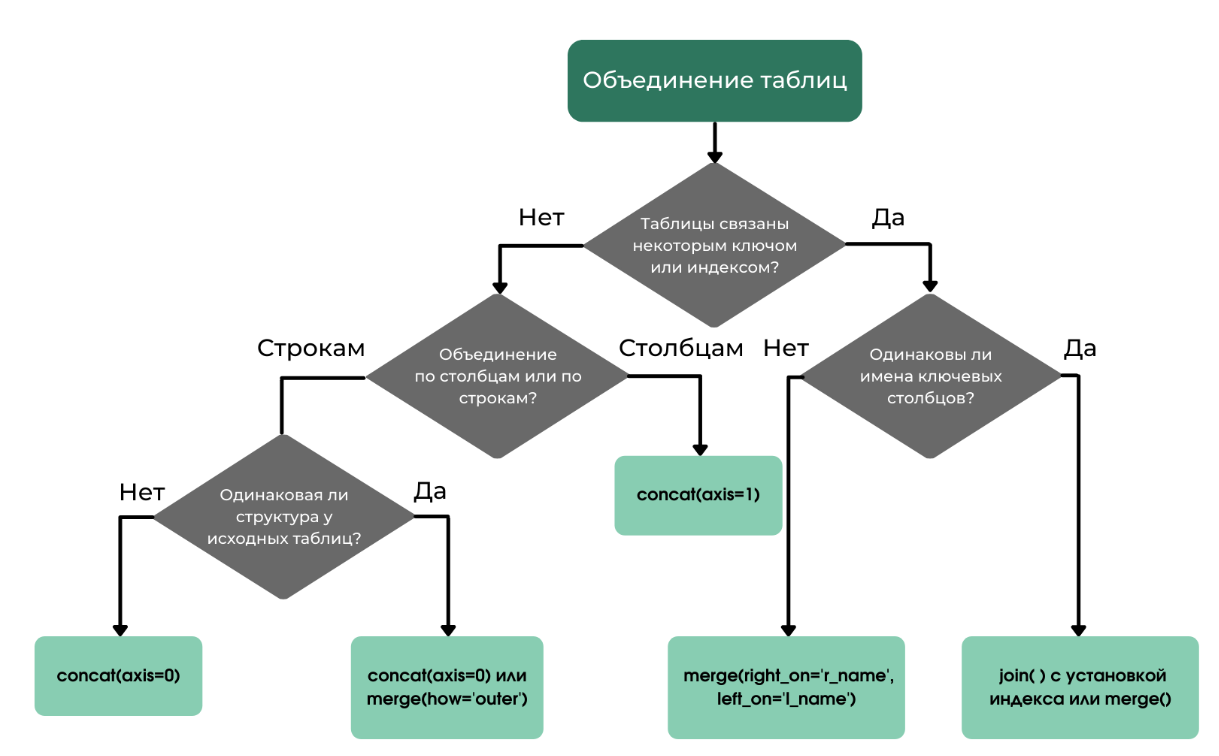